# Goodreads Popular and Trending Books - Data Analysis Project

## Dataset Source
This dataset was downloaded from [Kaggle - Goodreads Books Dataset](https://www.kaggle.com/datasets/nikhil1e9/goodreads-books).

The dataset includes features like book title, author, average score, ratings, shelvings, published year, and description, image.


## Goal / Objective

- Identify the authors with the highest number of books published.
- Identify books with the highest ratings
- Analyze publishing trends over time and identify peak publication periods.
- Understand the overall distribution of book scores, ratings and shelvings.
- Explore the relationship between reader engagement metrics such as ratings and shelvings and how they relate to perceived book quality score.
- Examine associations between key numerical variables.
- Conduct a time-based analysis to evaluate how reader engagement has evolved over the years.
- Determine are older books more highly rated than newer books

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Explore Data

In [2]:
df = pd.read_csv('Popular-Books.csv')
df.head()

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image
0,"The English Assassin (Gabriel Allon, #2)",Daniel Silva,4.16,40122,44602,2002,"The Unlikely Spy, Daniel Silva's extraordinary...",https://images-na.ssl-images-amazon.com/images...
1,Pompeii,Robert Harris,3.86,46097,64840,2003,With his trademark elegance and intelligence R...,https://images-na.ssl-images-amazon.com/images...
2,Notorious RBG: The Life and Times of Ruth Bade...,Irin Carmon,4.19,59670,171959,2015,You can't spell truth without Ruth.Only Ruth B...,https://images-na.ssl-images-amazon.com/images...
3,The Abolition of Man,C.S. Lewis,4.11,34390,52770,1943,Alternative cover for ISBN: 978-0060652944The ...,https://images-na.ssl-images-amazon.com/images...
4,Portrait of a Murderer,Anne Meredith (Pseudonym),3.38,1129,1739,1933,'Adrian Gray was born in May 1862 and met his ...,https://images-na.ssl-images-amazon.com/images...


In [3]:
df.shape

(27621, 8)

Dataset have 27621 rows and 8 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        27621 non-null  object 
 1   Author       27621 non-null  object 
 2   Score        27621 non-null  float64
 3   Ratings      27621 non-null  int64  
 4   Shelvings    27621 non-null  int64  
 5   Published    27621 non-null  int64  
 6   Description  27549 non-null  object 
 7   Image        27621 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


In [5]:
df.describe(include='all')

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image
count,27621,27621,27621.000000,2.762100e+04,2.762100e+04,27621.000000,27549,27621
unique,27371,11362,NaN,NaN,NaN,NaN,26863,27457
top,Selected Poems,Agatha Christie,NaN,NaN,NaN,NaN,This book was converted from its physical edit...,https://dryofg8nmyqjw.cloudfront.net/images/no...
freq,26,214,NaN,NaN,NaN,NaN,341,165
mean,NaN,NaN,3.968637,4.411364e+04,7.502149e+04,1967.833496,NaN,NaN
std,NaN,NaN,0.284129,2.002113e+05,2.805992e+05,38.745116,NaN,NaN
min,NaN,NaN,2.140000,1.000000e+00,5.100000e+01,1900.000000,NaN,NaN
25%,NaN,NaN,3.800000,7.870000e+02,1.913000e+03,1934.000000,NaN,NaN
50%,NaN,NaN,3.990000,4.649000e+03,1.180300e+04,1969.000000,NaN,NaN
75%,NaN,NaN,4.160000,2.696500e+04,4.974600e+04,2003.000000,NaN,NaN


In [6]:
df.columns

Index(['Title', 'Author', 'Score', 'Ratings', 'Shelvings', 'Published',
       'Description', 'Image'],
      dtype='object')

## Clean Data

In [7]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

In [8]:
df.isnull().sum()

Title           0
Author          0
Score           0
Ratings         0
Shelvings       0
Published       0
Description    72
Image           0
dtype: int64

In [9]:
(df.isnull().sum() / len(df)) * 100

Title          0.000000
Author         0.000000
Score          0.000000
Ratings        0.000000
Shelvings      0.000000
Published      0.000000
Description    0.260671
Image          0.000000
dtype: float64

Description column have 0.260671% null rows

In [10]:
df.Description.fillna('No Description', inplace = True)

In [11]:
(df.isnull().sum() / len(df)) * 100

Title          0.0
Author         0.0
Score          0.0
Ratings        0.0
Shelvings      0.0
Published      0.0
Description    0.0
Image          0.0
dtype: float64

## EDA

In [12]:
top_5_authors = df['Author'].value_counts().head(5).reset_index()
print(top_5_authors)

            Author  count
0  Agatha Christie    214
1      Enid Blyton    106
2   P.G. Wodehouse     95
3     Stephen King     90
4     Nora Roberts     81


Text(0, 0.5, 'Number of Books')

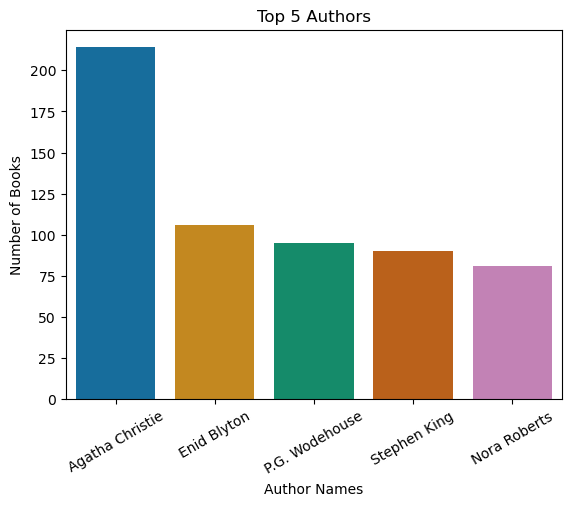

In [13]:
sns.barplot(data=top_5_authors, x='Author', y='count', palette='colorblind')
plt.xticks(rotation=30)
plt.title("Top 5 Authors")
plt.xlabel("Author Names")
plt.ylabel("Number of Books")

Agatha Christie has written the highest number of books in the dataset.

In [14]:
df.sort_values(by='Ratings', ascending=False).head(3)

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image
8438,Harry Potter and the Sorcerer’s Stone (Harry P...,J.K. Rowling,4.47,9596885,10297041,1997,An alternative cover for this ASIN can be foun...,https://images-na.ssl-images-amazon.com/images...
21409,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,9282201,10863204,2008,"Could you survive on your own in the wild, wit...",https://images-na.ssl-images-amazon.com/images...
14526,"Twilight (The Twilight Saga, #1)",Stephenie Meyer,3.65,6531352,7983156,2005,About three things I was absolutely positive.F...,https://images-na.ssl-images-amazon.com/images...


The most top rated book in the dataset is **"Harry Potter and the Sorcerer’s Stone"**

In [15]:
books_published_per_year = df.Published.value_counts().sort_index()
print(books_published_per_year)

Published
1900     200
1901     200
1902     200
1903     200
1904     200
        ... 
2020     200
2021     200
2022     200
2023    2266
2024     768
Name: count, Length: 125, dtype: int64


In [16]:
top_10_books_published_per_year = df['Published'].value_counts().head(10).reset_index()
top_10_books_published_per_year.columns = ['Published', 'Count']
top_10_books_published_per_year

,Published,Count
0,2023,2266
1,2024,768
2,1930,200
3,1901,200
4,1999,200
5,1929,200
6,2014,200
7,1921,200
8,1990,200
9,1958,200


Text(0, 0.5, 'Number of Books')

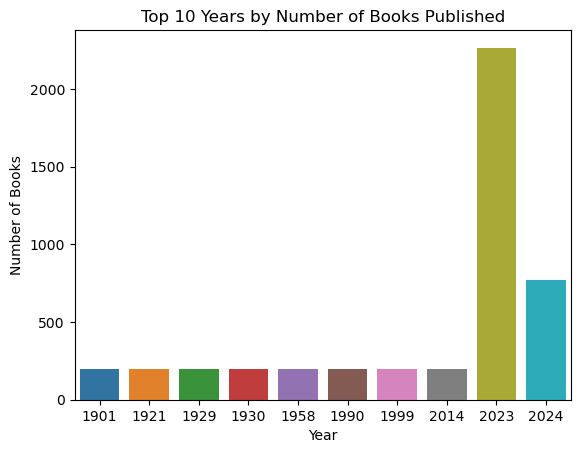

In [17]:
sns.barplot(data=top_10_books_published_per_year, x='Published', y='Count')
plt.title('Top 10 Years by Number of Books Published')
plt.xlabel('Year')
plt.ylabel('Number of Books')

In the year 2023, the highest number of books were published, with a total count of 2,266. This is followed by 2024, which had 768 books published. All other years in the top 10 — including 1930, 1901, 1999, 1929, 2014, 1921, 1990, and 1958 — had a moderate and identical count of 200 books each.

In [18]:
# score
df.Score.value_counts()

Score
4.03    437
4.00    430
4.06    421
4.09    416
4.08    413
       ... 
2.14      1
5.00      1
2.55      1
2.40      1
2.15      1
Name: count, Length: 224, dtype: int64

<Axes: xlabel='Score', ylabel='Count'>

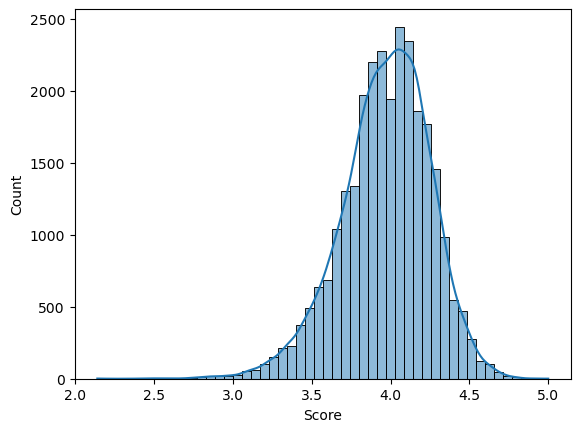

In [19]:
# score
sns.histplot(data=df, x='Score', kde=True, bins=50)

Most book scores are clustered around 4.0, showing a slightly right-skewed distribution. This indicates that books generally receive high ratings, with very few rated below 3.5 or above 4.5.

In [20]:
df['Ratings'].value_counts()

Ratings
100       31
16100     31
55        31
61        31
86        29
          ..
146490     1
13167      1
7426       1
3377       1
2313       1
Name: count, Length: 16093, dtype: int64

<Axes: xlabel='Ratings', ylabel='Count'>

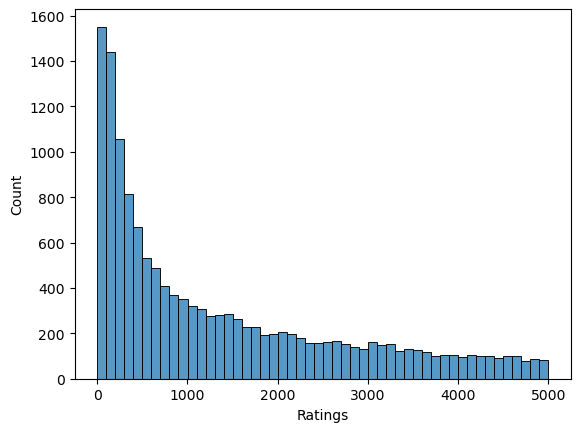

In [21]:
filter_df = df[df['Ratings'] < 5000]
sns.histplot(filter_df, x='Ratings', bins=50)

The distribution is right-skewed, showing that high-rating-count books are rare.

In [22]:
df['Shelvings'].value_counts()

Shelvings
16100    33
109      19
130      18
143      17
155      17
         ..
16525     1
4571      1
6060      1
99867     1
26656     1
Name: count, Length: 19284, dtype: int64

<Axes: xlabel='Shelvings', ylabel='Count'>

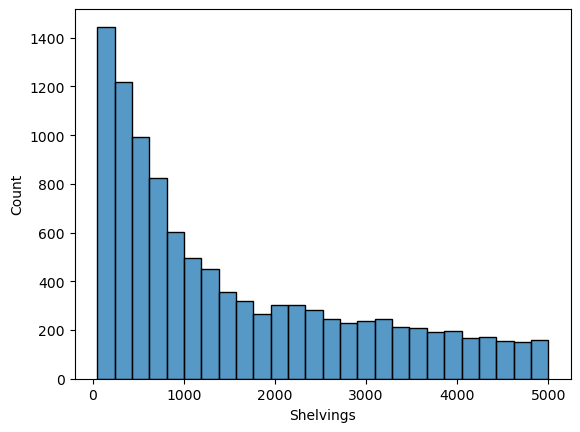

In [23]:
# Shelvings
filtered_shelvings = df[df['Shelvings'] < 5000]
sns.histplot(filtered_shelvings, x='Shelvings')

The Shelvings distribution is right-skewed, indicating that most books are shelved by a small number of users, while a few popular books are added to thousands of shelves.

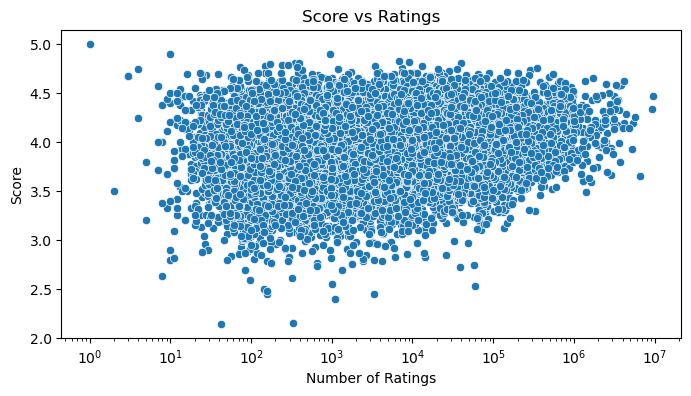

In [24]:
# score vs ratings
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Ratings', y='Score')
plt.title('Score vs Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Score')
plt.xscale('log')

There is no strong relationship between the number of ratings and score. Books with both high and low ratings tend to have scores clustered between 3.5 and 4.5, suggesting that popularity doesn't always mean higher quality.

In [25]:
df[['Score', 'Ratings']].corr()

,Score,Ratings
Score,1.000000,0.084948
Ratings,0.084948,1.000000


The Pearson correlation coefficient between Score and Ratings is approximately 0.085, indicating a very weak positive linear relationship. This suggests that books with higher scores are only slightly more likely to have higher rating counts, and other factors may influence popularity more strongly than the score alone.

In [26]:
published_decade = df['Published'] // 10 * 10
published_decade

0        2000
1        2000
2        2010
3        1940
4        1930
         ... 
27616    1960
27617    1930
27618    1920
27619    1930
27620    1970
Name: Published, Length: 27621, dtype: int64

Text(0, 0.5, 'Score')

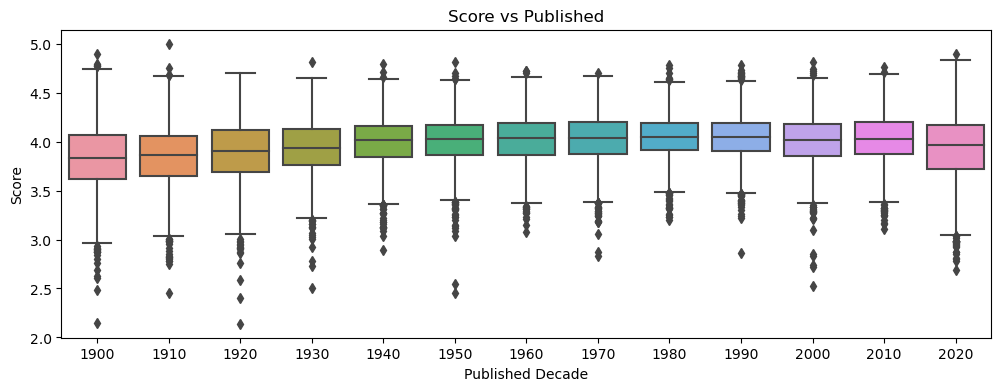

In [27]:
# Score vs Ratings
plt.figure(figsize=(12, 4))
sns.boxplot(x=published_decade, y=df['Score'])
plt.title('Score vs Published')
plt.xlabel('Published Decade')
plt.ylabel('Score')

Based on score trends across publication years, book quality has remained relatively consistent over the past century. The median score has stayed close to 4.0 in every decade, indicating that books continue to receive similar ratings over time. This suggests that the perceived quality of books, as rated by readers, has not significantly improved or declined over the years.

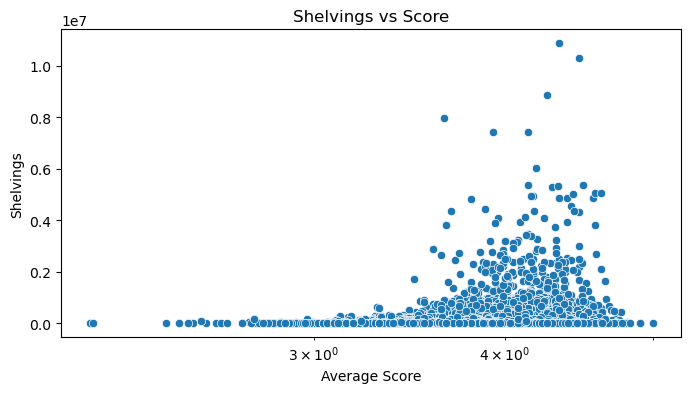

In [28]:
# Score vs Shelvings
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Score', y='Shelvings')
plt.title('Shelvings vs Score')
plt.xlabel('Average Score')
plt.ylabel('Shelvings')
plt.xscale('log')

While most highly scored books have moderate shelvings, some books with scores around 4.0–4.5 are shelved significantly more, suggesting that high scores can be linked to popularity, but the relationship is not very strong overall.

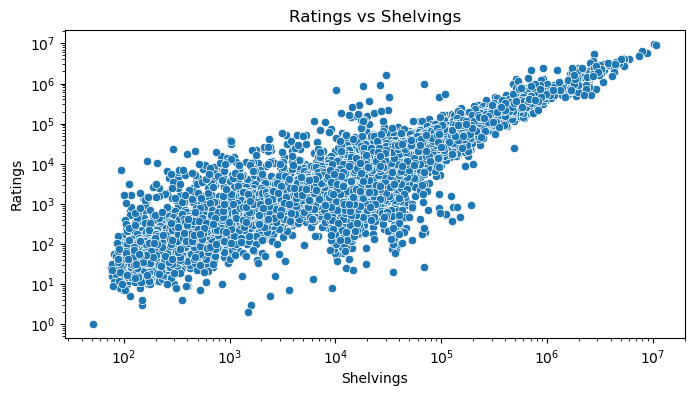

In [29]:
# Raings vs Shelvings
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Shelvings', y='Ratings')
plt.title('Ratings vs Shelvings')
plt.xlabel('Shelvings')
plt.ylabel('Ratings')
plt.xscale('log')
plt.yscale('log')

There is a strong positive relationship between shelvings and ratings books that are shelved more often also tend to receive more ratings.

In [30]:
publish_decades = df['Published'] // 10 * 10
publish_decades

0        2000
1        2000
2        2010
3        1940
4        1930
         ... 
27616    1960
27617    1930
27618    1920
27619    1930
27620    1970
Name: Published, Length: 27621, dtype: int64

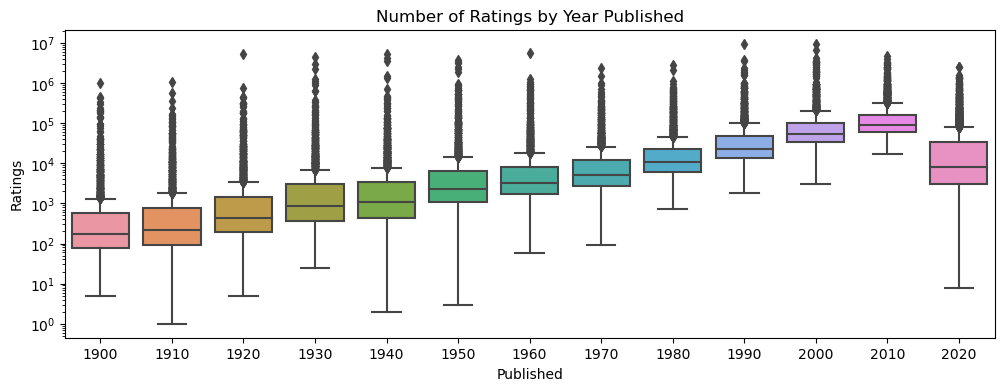

In [31]:
# Rating vs Published
plt.figure(figsize=(12,4))
sns.boxplot(x=publish_decades, y=df['Ratings'])
plt.title("Number of Ratings by Year Published")
plt.yscale('log')

Over the years, the number of ratings has generally increased, indicating that newer books tend to receive more reader engagement.

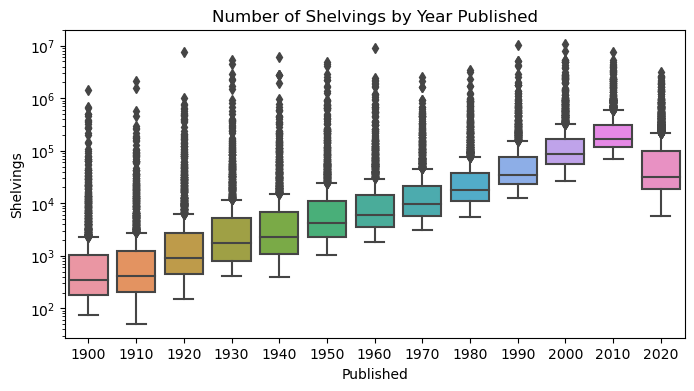

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(x=publish_decades, y=df['Shelvings'])
plt.title("Number of Shelvings by Year Published")
plt.yscale('log')

Newer books are more likely to be shelved. The plot shows a steady increase in shelvings from 1900 to 2020, with each decade showing higher median shelvings than the previous one. This suggests that reader engagement with books has grown consistently over time.

<Axes: >

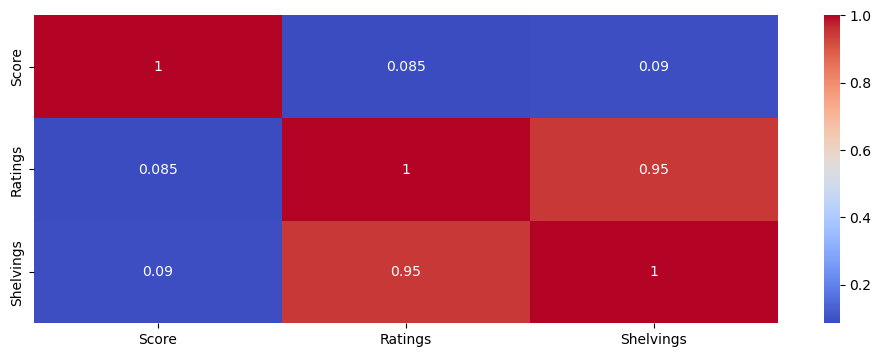

In [33]:
plt.figure(figsize=(12,4))
sns.heatmap(df[['Score', 'Ratings', 'Shelvings']].corr(), annot=True, cmap='coolwarm')

There is a strong positive correlation between Ratings and Shelvings (0.95), indicating that more shelved books are also more rated. In contrast, Score has very weak correlations with both, suggesting that book score is not strongly tied to Ratings and Shelvings.

Text(0.5, 1.0, 'Score vs Ratings Colored by Year Published')

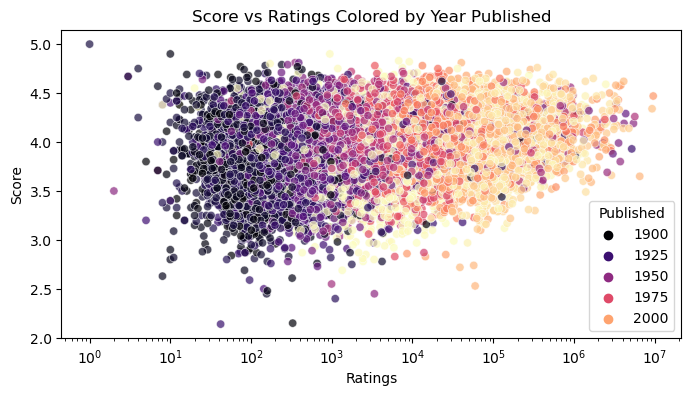

In [34]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Ratings', y='Score', hue='Published', palette='magma', alpha=0.7)
plt.xscale('log')
plt.title('Score vs Ratings Colored by Year Published')

Book scores stay mostly between 3.5 and 4.5, no matter how many ratings they have. But newer books tend to get more ratings, showing they are getting more attention from readers.

In [35]:
top_authors = df['Author'].value_counts().head(5).index
df_top_authors = df[df['Author'].isin(top_authors)].copy()
df_top_authors['Decade'] = (df_top_authors['Published'] // 10) * 10
df_top_authors

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image,Decade
64,The Sittaford Mystery,Agatha Christie,3.76,25436,32433,1931,"In a remote house in the middle of Dartmoor, s...",https://images-na.ssl-images-amazon.com/images...,1930
66,"Daring to Dream (Dream Trilogy, #1)",Nora Roberts,4.04,26808,37290,1996,"Margo, Kate and Laura were brought up like sis...",https://images-na.ssl-images-amazon.com/images...,1990
188,"Hercule Poirot's Christmas (Hercule Poirot, #20)",Agatha Christie,3.98,84521,99739,1938,"In Hercule Poirot's Christmas, the holidays ar...",https://images-na.ssl-images-amazon.com/images...,1930
198,Summer Moonshine,P.G. Wodehouse,4.11,1645,2196,1937,A full cast of Wodehouse creations—including t...,https://images-na.ssl-images-amazon.com/images...,1930
400,"Bed of Roses (Bride Quartet, #2)",Nora Roberts,4.12,64190,92385,2009,"Emmaline Grant has always loved romance, so it...",https://images-na.ssl-images-amazon.com/images...,2000
...,...,...,...,...,...,...,...,...,...
27270,Elevation,Stephen King,3.64,136507,234283,2018,"Castle Rock is a small town, where word gets a...",https://images-na.ssl-images-amazon.com/images...,2010
27277,The Adventure of the Egyptian Tomb: a Hercule ...,Agatha Christie,3.66,2497,3754,1923,Do you believe in the curse surrounding the op...,https://images-na.ssl-images-amazon.com/images...,1920
27428,"Death on the Nile (Hercule Poirot, #18)",Agatha Christie,4.12,259973,364771,1937,The tranquility of a lovely cruise along the N...,https://images-na.ssl-images-amazon.com/images...,1930
27571,The Pothunters and Other School Stories (Schoo...,P.G. Wodehouse,3.46,974,892,1902,"'You have been misinformed, I fear, Sir Alfred...",https://images-na.ssl-images-amazon.com/images...,1900


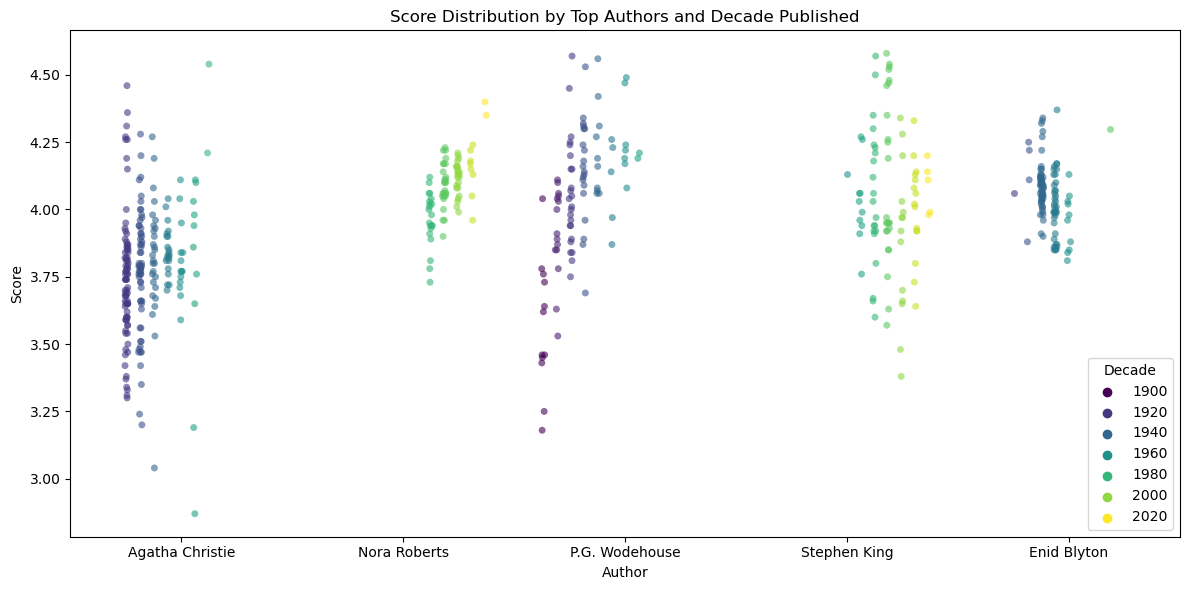

In [36]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_top_authors, x='Author', y='Score', hue='Decade', dodge=True, jitter=True, palette='viridis', alpha=0.6)

plt.title("Score Distribution by Top Authors and Decade Published")
plt.legend(title='Decade', loc='lower right')
plt.ylabel("Score")
plt.xlabel("Author")
plt.tight_layout()
plt.show()

All top authors have scores mostly between 3.5 and 4.5, with consistent quality across decades. There is no strong trend showing scores changing over time.

In [37]:
# Are older books more highly rated than newer books
from scipy.stats import ttest_ind
old_books = df[df['Published'] < 2000]['Score']
old_books
new_books = df[df['Published'] >= 2000]['Score']
new_books

0        4.16
1        3.86
2        4.19
6        3.73
13       3.80
         ... 
27594    4.12
27596    3.38
27600    4.13
27608    4.23
27610    3.87
Name: Score, Length: 7629, dtype: float64

In [38]:
t_stat, p_val = ttest_ind(old_books, new_books, equal_var = False)
print(f"P-value : {p_val}")

P-value : 3.490347924141348e-05


This indicates that there is a statistically significant difference in the average scores of older books published before 2000 and newer books published after 2000.  
This suggests that publishing year has an impact on how books are scored by users, and that the two groups likely come from different score distributions.

In [39]:
print("Old books mean score:", old_books.mean())
print("New books mean score:", new_books.mean())

Old books mean score: 3.9641996798719488
New books mean score: 3.9802660899200415


This suggests that newer books tend to receive slightly higher scores than older books, and the difference is unlikely to be due to random chance. However, the practical impact of this difference may be minimal due to the closeness of the scores.

## Conclusion

This project explored trends, relationships, and patterns within a dataset of popular and trending books from Goodreads. Through structured exploratory data analysis (EDA), we uncovered key insights about authorship, publishing trends, reader engagement, and book quality perceptions.

- **Agatha Christie** emerged as the most prolific author in the dataset.
- **Publication activity** peaked in recent years, with **2023** showing the highest number of published books, indicating a significant rise in recent book entries.
- The **distribution of book scores** is tightly clustered around 4.0, suggesting a general trend of positive reader feedback. However, both **ratings and shelvings** are highly skewed most books are modestly engaged with, while a few gain massive popularity.
- There is a **very weak correlation (0.085)** between score and ratings, indicating that popularity does not necessarily reflect perceived quality. In contrast, a **strong correlation (0.95)** was found between shelvings and ratings, revealing that books frequently added to shelves are also more frequently rated.
- **Time-based analysis** showed that newer books receive more ratings and shelvings, showing a steady rise in reader engagement over time.
- A **t-test comparing book scores** before and after the year 2000 revealed a statistically significant difference, with newer books receiving slightly higher average scores. However, the **practical impact** of this difference is minimal due to the closeness of mean scores.

Overall, the analysis highlights that while **popularity (ratings and shelvings) continues to grow** for newer books, **book quality represented by score remains stable** across decades. This reinforces the idea that high reader interaction doesn't necessarily translate to higher ratings, and book success is influenced by multiple nuanced factors beyond just perceived quality.
